In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets,transforms

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
transforms=transforms.ToTensor()

In [6]:
train_data=datasets.MNIST(root='Balo',train=True,download=True,transform=transforms)

C:\Users\rohan\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
test_data=datasets.MNIST(root='Balo',train=False,download=True,transform=transforms)

In [8]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: Balo
    Split: Train
    StandardTransform
Transform: ToTensor()

In [9]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [10]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: Balo
    Split: Test
    StandardTransform
Transform: ToTensor()

In [11]:
type(test_data)

torchvision.datasets.mnist.MNIST

In [12]:
train_data[0][1]

5

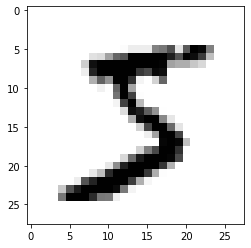

In [13]:
plt.imshow(train_data[0][0].reshape(28,28),cmap='gist_yarg')

In [14]:
torch.manual_seed(101)

In [15]:
train_loader=DataLoader(train_data,batch_size=100,shuffle=True)

In [16]:
test_loader=DataLoader(test_data,batch_size=500,shuffle=False)

In [17]:
from torchvision.utils import make_grid

In [18]:
for images,labels in train_loader:
    break


In [19]:
images.shape

torch.Size([100, 1, 28, 28])

In [20]:
labels.shape

torch.Size([100])

In [21]:
print('Labels',labels[:12].numpy())

Labels [7 2 3 5 8 5 3 6 9 9 1 3]


In [22]:
im=make_grid(images[:12],nrow=13)

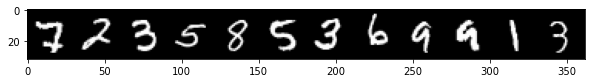

In [23]:
plt.figure(figsize=(10,6))
plt.imshow(np.transpose(im.numpy(),(1,2,0)))

In [24]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self,in_features=784,out=10,layers=[120,84]):
        super().__init__()
        self.fc1=nn.Linear(in_features,layers[0])
        self.fc2=nn.Linear(layers[0],layers[1])
        self.fc3=nn.Linear(layers[1],out)
        
    def forward(self,X):
        X=F.relu(self.fc1(X))
        X=F.relu(self.fc2(X))
        X=self.fc3(X)
        
        return F.log_softmax(X,dim=1)

In [25]:
torch.manual_seed(101)
model=MultiLayerPerceptron()

In [26]:
model

MultiLayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [27]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [28]:
images.view(100,-1).shape

torch.Size([100, 784])

In [29]:
epochs=10
train_losses=[]
test_losses=[]
train_corr=[]
test_corr=[]

for i in range(epochs):
    train_corer=0
    test_corer=0
    for b,(X_train,y_train) in enumerate(train_loader):
        b+=1
        y_pred=model(X_train.view(100,-1))
        loss=criterion(y_pred,y_train)
        predicted=torch.max(y_pred.data,1)[1]
        batch_corr=(predicted==y_train).sum()
        train_corer+=batch_corr
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_losses.append(loss)
    train_corr.append(train_corer)
    

        

In [30]:
print(loss)

tensor(0.0453, grad_fn=<NllLossBackward>)


In [31]:
testo_loader=DataLoader(test_data,batch_size=10000,shuffle=False)
with torch.no_grad():
    for b,(X_test,y_test) in enumerate(testo_loader):
        y_val=model(X_test.view(10000,-1))

loss=criterion(y_val,y_test)       
print(loss)

tensor(0.0849)


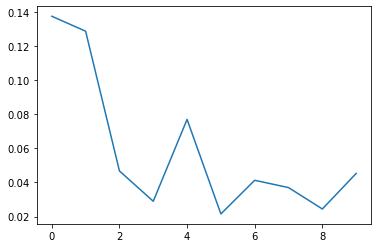

In [32]:
plt.plot(train_losses)


In [33]:
y_test.view(-1).shape


torch.Size([10000])

In [34]:
y_val.view(-1).shape

torch.Size([100000])

In [40]:
y_test.view(-1)

torch.Size([10000])